In [2]:
import NMIXStudio as hps
from NMIXStudio import NMICommand,NMIEndpoint,NMIDevice
import time
print(hps.help())

hpSPM+ API package:
Version: 0.1.6

Docs:
C:\Users\furkan.eren\AppData\Local\Programs\Python\Python311\Lib\site-packages\NMIXStudio\Docs
None


In [3]:
Endpoint = NMIEndpoint("192.168.10.53",9024)
Device = NMIDevice(Endpoint)
Scan = Device.SCAN()
XYOffsetController = Device.XYOFFSET()
Status = Device.STATUS()

In [4]:
Scan.Set_XOffset(0) 
Scan.Set_YOffset(0)

Scan.Set_ScanHeightPixel(32) #32pixel
Scan.Set_ScanWidthPixel(32) #32pixel

Scan.Set_ImageWidth(3) #RealDistance 
Scan.Set_ImageHeight(3) #RealDistance

Scan.Set_ScanAngle(0)

Scan.Set_ScanNumberOfAverages(4)
Scan.Set_NumberOfScans(1)
Scan.Set_ScanSpeed(100)    
Scan.Set_IsSaveScannedImages(True)
Scan.Set_OffsetPosition("BottomLeft")
Scan.Set_ScanDirection("BottomToTop")

{'ResponseStatus': True, 'message': 'Successful'}

In [5]:
isScanning = Scan.Get_IsScanning()["IsScanning"] == True
print(isScanning)

False


In [6]:
print(Scan.StopScan(True))
isScanning = Scan.Get_IsScanning()["IsScanning"] == True
hasError = Scan.Get_ScanError()["ScanError"]
status = Status.Get_Status()
time.sleep(2)
print(isScanning,hasError,status)
if(isScanning==False and status == "Ready"):
    print(Scan.StartScan(True))
    print("Scan Started")
    time.sleep(2)
    while(True):
        isScanning = Scan.Get_IsScanning()["IsScanning"] == True
        if(isScanning==False):
            break
        print(Scan.Get_ScanLineIndex())
        print(Scan.Get_ScanIndex())
        time.sleep(0.5) 
hasError = Scan.Get_ScanError()["ScanError"]
print(hasError)

{'ResponseStatus': True, 'message': 'Successful'}
False ScanStop_NoFail Ready
{'ResponseStatus': True, 'message': 'Successful'}
Scan Started
ScanStop_NoFail


In [7]:
ScannedImages = Device.SCANNEDIMAGES()
print(ScannedImages.Get_NmiContainers())

['None 12.27.2012 16.47.39', 'hpSPMPlus_LT_AFM_MFM_Contact_sca3x3μm_spd100_px32x32_2024.12.24_11.15.42.548']


In [12]:
print(ScannedImages.Get_SelectedContainerImageList('None 12.27.2012 16.47.39'))

['Amplitude (F) (256x256)', 'Vz (F) (256x256)', 'Spare 0 (F) (256x256)', 'Amplitude (B) (256x256)', 'Vz (B) (256x256)', 'Spare 0 (B) (256x256)']


In [10]:
import numpy as np
from PIL import Image
import requests
import time
import matplotlib.pyplot as plt

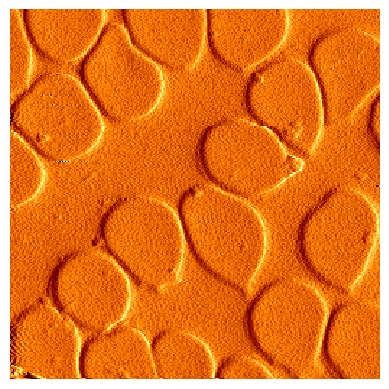

In [13]:
data = ScannedImages.Get_SelectedContainerImage('None 12.27.2012 16.47.39',
                                               'Amplitude (F) (256x256)')
# Veriler
data_string = data["RawBuffer"]
width = 256
height = 256

# Veri işleme
data = np.array([int(x) for x in data_string.split(";")], dtype=np.int32)
image_data = data.reshape((height, width))
image_data = ((image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data)) * 255).astype(np.uint8)

# Colormap uygulama
colormap = plt.get_cmap('afmhot')
colored_image_data = colormap(image_data)

# Jupyter Notebook'ta gösterim
plt.imshow(colored_image_data, interpolation='nearest')
plt.axis('off')  # İstenirse eksenleri kaldırmak için
plt.show()



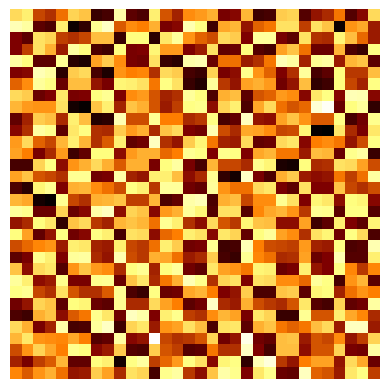

In [48]:
data = ScannedImages.Get_SelectedContainerImage('hpSPMPlus_LT_AFM_MFM_Contact_sca3x3Å_spd100_px32x32_2024.12.24_10.21.14.574',
                                               'Amplitude_Bwd (32x32)')
# Veriler
data_string = data["RawBuffer"]
width = 32
height = 32

# Veri işleme
data = np.array([int(x) for x in data_string.split(";")], dtype=np.int32)
image_data = data.reshape((height, width))
image_data = ((image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data)) * 255).astype(np.uint8)

# Colormap uygulama
colormap = plt.get_cmap('afmhot')
colored_image_data = colormap(image_data)

# Jupyter Notebook'ta gösterim
plt.imshow(colored_image_data, interpolation='nearest')
plt.axis('off')  # İstenirse eksenleri kaldırmak için
plt.show()

In [ ]:
data = ScannedImages.Get_SelectedContainerImage('hpSPMPlus_LT_AFM_MFM_Contact_sca3x3Å_spd100_px32x32_2024.12.24_10.21.14.574',
                                               'Amplitude_Bwd (32x32)')
# Veriler
data_string = data["RawBuffer"]
width = 32
height = 32

# Veri işleme
data = np.array([int(x) for x in data_string.split(";")], dtype=np.int32)
image_data = data.reshape((height, width))
image_data = ((image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data)) * 255).astype(np.uint8)

# Colormap uygulama
colormap = plt.get_cmap('afmhot')
colored_image_data = colormap(image_data)

# Jupyter Notebook'ta gösterim
plt.imshow(colored_image_data, interpolation='nearest')
plt.axis('off')  # İstenirse eksenleri kaldırmak için
plt.show()